In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
import statsmodels.api as sm
from statsmodels.compat import lzip


### Model with Scaled Data

In [2]:
df = pd.read_csv('Scaled Data.csv')
df.head()

,Unnamed: 0,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa,status_Developing,life_expectancy,year,...,hiv_aids,gdp,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,health_expenditure%_gdp,obesity_adlts
0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.518840,-1.626978,...,-0.324055,-0.510758,3.244584,-1.150933,-1.357115,-1.909045,-2.840837,-1.246299,-0.296260,-1.429186
1,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.466227,-1.410048,...,-0.324055,-0.510543,3.201872,-1.128588,-1.347729,-1.791577,-2.839533,-1.207619,-0.284611,-1.418063
2,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.371524,-1.193118,...,-0.324055,-0.505405,3.159159,-1.106243,-1.343036,-1.703476,-2.731393,-0.814554,1.372584,-1.395818
3,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.318912,-0.976187,...,-0.324055,-0.504611,3.116447,-1.083897,-1.192865,-1.615375,-2.623212,-0.811464,1.169146,-1.384695
4,4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.287344,-0.759257,...,-0.324055,-0.503120,3.073735,-1.061552,-1.155323,-1.527274,-2.514165,-0.811464,1.520495,-1.362450


In [3]:
df.columns

Index(['Unnamed: 0', 'region_Europe & Central Asia',
       'region_Latin America & Caribbean', 'region_Middle East & North Africa',
       'region_North America', 'region_South Asia',
       'region_Sub-Saharan Africa', 'status_Developing', 'life_expectancy',
       'year', 'adult_mortality', 'infant_mortality', '1-4_mortality',
       'alcohol', 'hep_b', 'bmi', 'polio', 'health_gov_expendt%', 'dtp3',
       'hiv_aids', 'gdp', '5_19thinness', '5_19obesity', 'hdi', 'schooling',
       'drinking_water', 'national_income_capita', 'health_expenditure%_gdp',
       'obesity_adlts'],
      dtype='object')

In [4]:
df = df.drop(['Unnamed: 0'], axis = 1)

#### Checking Linearity :

Linear Regression requires the predictor and the target variable to be linear. Pairplots help us to determine which variables are linearly related with the target variable.

The following predictor variables do not exhibit linear relation with the target variable. So these variables are dropped.

In [5]:
df_plot = df.drop(['region_Europe & Central Asia', 'region_Latin America & Caribbean', 'region_Middle East & North Africa', 'region_North America','region_South Asia', 'region_Sub-Saharan Africa', 'status_Developing', 'year'], axis =1)

In [6]:
df_plot = df.drop(['life_expectancy'], axis =1)

In [7]:
df.columns

Index(['region_Europe & Central Asia', 'region_Latin America & Caribbean',
       'region_Middle East & North Africa', 'region_North America',
       'region_South Asia', 'region_Sub-Saharan Africa', 'status_Developing',
       'life_expectancy', 'year', 'adult_mortality', 'infant_mortality',
       '1-4_mortality', 'alcohol', 'hep_b', 'bmi', 'polio',
       'health_gov_expendt%', 'dtp3', 'hiv_aids', 'gdp', '5_19thinness',
       '5_19obesity', 'hdi', 'schooling', 'drinking_water',
       'national_income_capita', 'health_expenditure%_gdp', 'obesity_adlts'],
      dtype='object')

In [8]:
# p = sns.pairplot(df_plot, x_vars=df[df.columns[9:]], y_vars=df['life_expectancy'], height=3, aspect=1)

In [9]:
df.head()

,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa,status_Developing,life_expectancy,year,adult_mortality,...,hiv_aids,gdp,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,health_expenditure%_gdp,obesity_adlts
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.518840,-1.626978,1.056456,...,-0.324055,-0.510758,3.244584,-1.150933,-1.357115,-1.909045,-2.840837,-1.246299,-0.296260,-1.429186
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.466227,-1.410048,0.979460,...,-0.324055,-0.510543,3.201872,-1.128588,-1.347729,-1.791577,-2.839533,-1.207619,-0.284611,-1.418063
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.371524,-1.193118,0.849222,...,-0.324055,-0.505405,3.159159,-1.106243,-1.343036,-1.703476,-2.731393,-0.814554,1.372584,-1.395818
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.318912,-0.976187,0.797768,...,-0.324055,-0.504611,3.116447,-1.083897,-1.192865,-1.615375,-2.623212,-0.811464,1.169146,-1.384695
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.287344,-0.759257,0.757883,...,-0.324055,-0.503120,3.073735,-1.061552,-1.155323,-1.527274,-2.514165,-0.811464,1.520495,-1.362450


<AxesSubplot:>

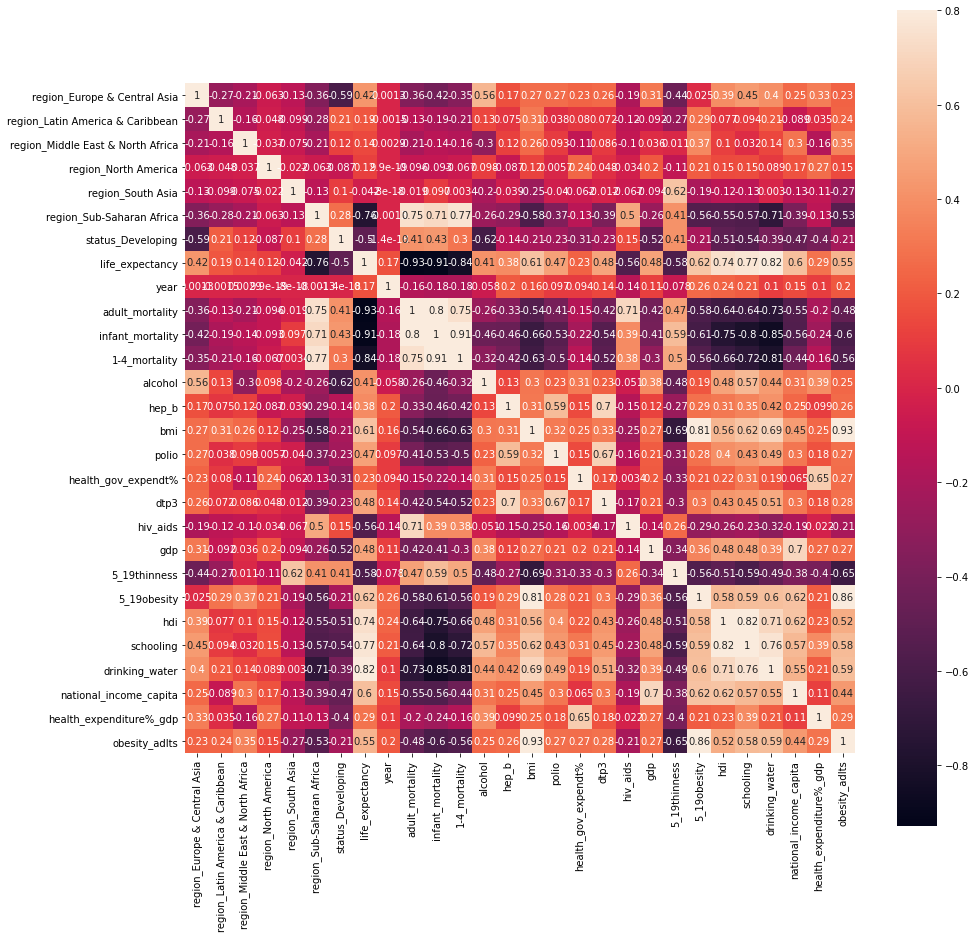

In [10]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True)


In [11]:
df_2 = df.drop(['alcohol','hep_b','health_gov_expendt%','health_expenditure%_gdp','polio'], axis = 1)
df_2.head()

,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa,status_Developing,life_expectancy,year,adult_mortality,...,dtp3,hiv_aids,gdp,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,obesity_adlts
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.518840,-1.626978,1.056456,...,-2.454798,-0.324055,-0.510758,3.244584,-1.150933,-1.357115,-1.909045,-2.840837,-1.246299,-1.429186
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.466227,-1.410048,0.979460,...,-2.075273,-0.324055,-0.510543,3.201872,-1.128588,-1.347729,-1.791577,-2.839533,-1.207619,-1.418063
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.371524,-1.193118,0.849222,...,-1.948764,-0.324055,-0.505405,3.159159,-1.106243,-1.343036,-1.703476,-2.731393,-0.814554,-1.395818
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.318912,-0.976187,0.797768,...,-1.737917,-0.324055,-0.504611,3.116447,-1.083897,-1.192865,-1.615375,-2.623212,-0.811464,-1.384695
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.287344,-0.759257,0.757883,...,-3.256019,-0.324055,-0.503120,3.073735,-1.061552,-1.155323,-1.527274,-2.514165,-0.811464,-1.362450


Splitting the dataset into training and testing sets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y = df_2.life_expectancy

In [14]:
X = df_2.drop('life_expectancy', axis = 1)
X.head()

,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa,status_Developing,year,adult_mortality,infant_mortality,...,dtp3,hiv_aids,gdp,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,obesity_adlts
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.626978,1.056456,2.134249,...,-2.454798,-0.324055,-0.510758,3.244584,-1.150933,-1.357115,-1.909045,-2.840837,-1.246299,-1.429186
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.410048,0.979460,2.058413,...,-2.075273,-0.324055,-0.510543,3.201872,-1.128588,-1.347729,-1.791577,-2.839533,-1.207619,-1.418063
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.193118,0.849222,1.973589,...,-1.948764,-0.324055,-0.505405,3.159159,-1.106243,-1.343036,-1.703476,-2.731393,-0.814554,-1.395818
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.976187,0.797768,1.880102,...,-1.737917,-0.324055,-0.504611,3.116447,-1.083897,-1.192865,-1.615375,-2.623212,-0.811464,-1.384695
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.759257,0.757883,1.786125,...,-3.256019,-0.324055,-0.503120,3.073735,-1.061552,-1.155323,-1.527274,-2.514165,-0.811464,-1.362450


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2196, 22), (732, 22), (2196,), (732,))

VIF test on the training set to find varibales that may be correlated with each other

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
def vif_scores(X_train):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = X_train.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    VIF_Scores = VIF_Scores.sort_values(by = "VIF Scores", ascending = False)
    VIF_Scores = round(VIF_Scores, 2)
    return VIF_Scores

In [19]:
vif_scores(X_train)

,Independent Features,VIF Scores
21,obesity_adlts,14.36
11,bmi,12.08
9,infant_mortality,12.04
16,5_19obesity,9.40
10,1-4_mortality,7.95
8,adult_mortality,7.91
15,5_19thinness,6.23
19,drinking_water,5.80
6,status_Developing,5.56
18,schooling,4.92


In [20]:
X_train = X_train.drop('obesity_adlts', axis = 1)


In [21]:
vif_scores(X_train)

,Independent Features,VIF Scores
9,infant_mortality,11.93
10,1-4_mortality,7.95
8,adult_mortality,7.74
16,5_19obesity,6.41
15,5_19thinness,6.21
11,bmi,5.90
19,drinking_water,5.63
6,status_Developing,5.38
18,schooling,4.91
5,region_Sub-Saharan Africa,4.72


In [22]:
X_train = X_train.drop('infant_mortality', axis = 1)


In [23]:
vif_scores(X_train)

,Independent Features,VIF Scores
8,adult_mortality,7.02
15,5_19obesity,6.40
14,5_19thinness,6.15
10,bmi,5.87
6,status_Developing,5.32
18,drinking_water,5.23
9,1-4_mortality,4.88
17,schooling,4.84
5,region_Sub-Saharan Africa,4.62
19,national_income_capita,3.77


In [24]:
X_train = X_train.drop('5_19obesity', axis = 1)

In [25]:
vif_scores(X_train)

,Independent Features,VIF Scores
8,adult_mortality,6.89
14,5_19thinness,6.06
6,status_Developing,5.23
17,drinking_water,5.18
9,1-4_mortality,4.72
16,schooling,4.71
5,region_Sub-Saharan Africa,4.50
10,bmi,3.84
15,hdi,3.67
18,national_income_capita,3.22


### Using scikit learn for regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [27]:
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [28]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))
print("Mean Sq error: {}".format(mean_squared_error(y_true=y_train,y_pred=y_pred)))

R squared: 0.9456672490618263
Mean Sq error: 0.054274747291811594


Checking wether the error terms are normally distributed


In [29]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -6.67347173271952e-18


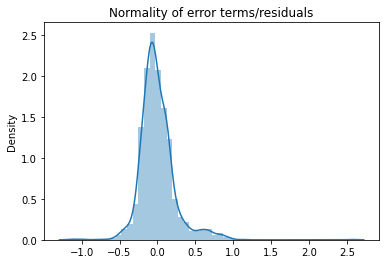

In [30]:
residual_plot = sns.distplot(residuals,kde=True)
residual_plot = plt.title('Normality of error terms/residuals')

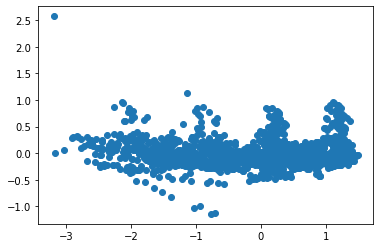

In [31]:
plt.scatter(y_pred,residuals)
plt.show()

In [32]:
X_train.shape, residuals.shape

((2196, 19), (2196,))

Check for Homoscedasticity

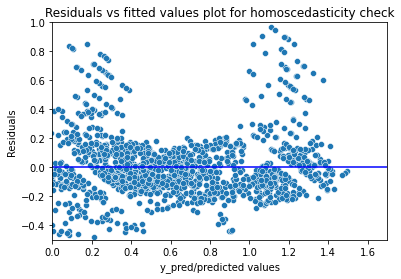

In [33]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.5,1)
plt.xlim(0,1.7)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [34]:
# y_pred.shape, X_train_updated.shape

Goldfeld Quandt Test
Checking heteroscedasticity 

Null Hypothesis: Error terms are homoscedastic <br>
Alternative Hypothesis: Error terms are heteroscedastic.

Since p value is more than 0.05 in Goldfeld Quandt Test, we reject the null hypothesis that error terms are homoscedastic. Therefore, we conclude that error terms are heteroscedastic

Performing Durbin-Watson test for detecting the presence of Autocorrelation

In [36]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuals)

2.0312299916257017

Since the value of the Durbin-Watson statistic is close to 2, we conclude that autocorrrelation is absent

def model():
    regr = LinearRegression()
    X_train = df[X1]
    regr.fit(X_train,y_train)
    y_pred = regr.predict(X_train)
    return y_pred

In [37]:
coef = pd.Series(regr.coef_, index = X_train.columns)

In [38]:
coef

region_Europe & Central Asia         0.046078
region_Latin America & Caribbean     0.194682
region_Middle East & North Africa    0.037173
region_North America                 0.163461
region_South Asia                    0.149092
region_Sub-Saharan Africa           -0.010138
status_Developing                   -0.169478
year                                 0.014007
adult_mortality                     -0.593757
1-4_mortality                       -0.177298
bmi                                 -0.081002
dtp3                                 0.004163
hiv_aids                             0.037887
gdp                                  0.016320
5_19thinness                        -0.106051
hdi                                  0.033559
schooling                            0.061178
drinking_water                       0.103460
national_income_capita               0.032918
dtype: float64

In [39]:
print(X_test.columns) 
print(X_train.columns)

Index(['region_Europe & Central Asia', 'region_Latin America & Caribbean',
       'region_Middle East & North Africa', 'region_North America',
       'region_South Asia', 'region_Sub-Saharan Africa', 'status_Developing',
       'year', 'adult_mortality', 'infant_mortality', '1-4_mortality', 'bmi',
       'dtp3', 'hiv_aids', 'gdp', '5_19thinness', '5_19obesity', 'hdi',
       'schooling', 'drinking_water', 'national_income_capita',
       'obesity_adlts'],
      dtype='object')
Index(['region_Europe & Central Asia', 'region_Latin America & Caribbean',
       'region_Middle East & North Africa', 'region_North America',
       'region_South Asia', 'region_Sub-Saharan Africa', 'status_Developing',
       'year', 'adult_mortality', '1-4_mortality', 'bmi', 'dtp3', 'hiv_aids',
       'gdp', '5_19thinness', 'hdi', 'schooling', 'drinking_water',
       'national_income_capita'],
      dtype='object')


In [40]:
X_test = X_test.drop(['obesity_adlts', 'infant_mortality', '5_19obesity'], axis = 1)

In [41]:
y_predicted = regr.predict(X_test)

In [42]:
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_predicted)))
print("Mean Sq error: {}".format(mean_squared_error(y_true=y_test,y_pred=y_predicted)))
print("RMSE: {}".format((mean_squared_error(y_true=y_test,y_pred=y_predicted)) ** (0.5)))

R squared: 0.9425465507112559
Mean Sq error: 0.05761086695599956
RMSE: 0.2400226384239611


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value')

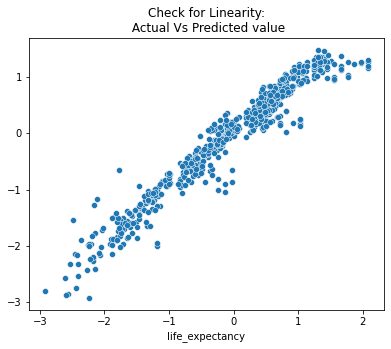

In [43]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_predicted,ax=ax)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

In [44]:
ax = f.add_subplot(122)
sns.distplot((y_test - y_predicted),ax=ax,color='b')
ax.axvline((y_test - y_predicted).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror')
plt.show()

### Using statsmodels for regression

Adding intercept terms to training and test sets


In [45]:
X1_train = sm.add_constant(X_train)
X1_test = sm.add_constant(X_test)

In [46]:
mod = sm.OLS(y_train, X1_train)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     1993.
Date:                Sun, 22 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:39:15   Log-Likelihood:                 83.249
No. Observations:                2196   AIC:                            -126.5
Df Residuals:                    2176   BIC:                            -12.61
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [47]:
ypred = res.predict(X1_test)
print(ypred)

2390   -1.663498
196    -0.033159
2307    1.152370
1731    0.058561
1100   -0.990506
          ...   
69      0.192973
2677    0.358644
840    -1.250044
1587    0.307673
1187   -0.628478
Length: 732, dtype: float64


In [48]:
# fig, ax = plt.subplots()
# ax.plot(X_train, y_train, 'o', label="Data")
# ax.plot(X_test, y_pred, 'b-', label="True")
# # ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
# ax.legend(loc="best");

In [49]:
res.params

const                                0.083476
region_Europe & Central Asia         0.046078
region_Latin America & Caribbean     0.194682
region_Middle East & North Africa    0.037173
region_North America                 0.163461
region_South Asia                    0.149092
region_Sub-Saharan Africa           -0.010138
status_Developing                   -0.169478
year                                 0.014007
adult_mortality                     -0.593757
1-4_mortality                       -0.177298
bmi                                 -0.081002
dtp3                                 0.004163
hiv_aids                             0.037887
gdp                                  0.016320
5_19thinness                        -0.106051
hdi                                  0.033559
schooling                            0.061178
drinking_water                       0.103460
national_income_capita               0.032918
dtype: float64

<AxesSubplot:xlabel='life_expectancy'>

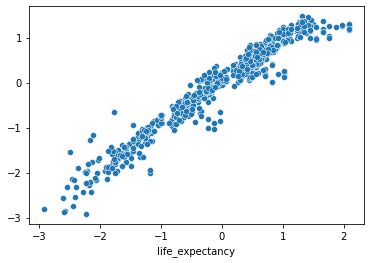

In [50]:
sns.scatterplot(y_test, ypred)

Text(0.5, 1.0, 'Normality of error terms/residuals')

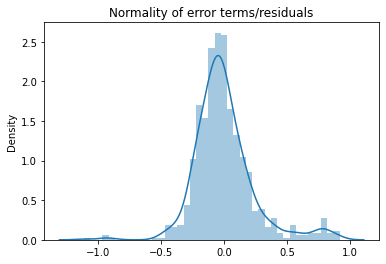

In [51]:
sns.distplot(y_test-ypred)
plt.title('Normality of error terms/residuals')

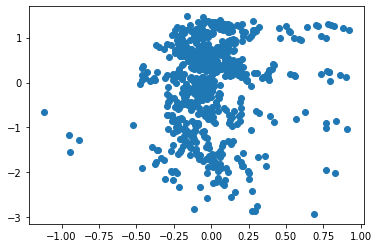

In [52]:
plt.scatter(y_test-ypred, ypred)
plt.show()

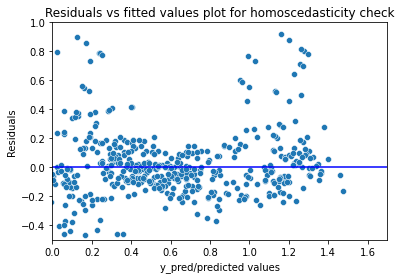

In [53]:
p = sns.scatterplot(ypred, y_test-ypred)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.5,1)
plt.xlim(0,1.7)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [ ]:
# name = ['F statistic', 'p-value']
# test = sms.het_goldfeldquandt(residuals, X_train)
# lzip(name, test)

Use scikit-learn metrics to evaluate root mean square error

In [54]:
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=ypred)))
print("Mean Sq error: {}".format(mean_squared_error(y_true=y_test,y_pred=ypred)))
print("RMSE: {}".format((mean_squared_error(y_true=y_test,y_pred=ypred)) ** (0.5)))

R squared: 0.9425465507112559
Mean Sq error: 0.057610866955999616
RMSE: 0.2400226384239612


In [59]:
sm.tools.eval_measures.rmse(y_test,ypred, axis=0)

0.2400226384239612